## 1. 데이터 불러오기

In [1]:
import pandas as pd

data2=pd.read_excel('data/data2.xlsx', sheet_name='data2', header=0)

print(data2.columns[-29:])
data2 = data2.iloc[:, -29:]
# replace 0 to small value such as 1e-6
data2 = data2.replace(0, 1e-6)

print(data2)

Index(['H1_Read_Count', 'H2_Read_Count', 'H3_Read_Count', 'H4_Read_Count',
       'H5_Read_Count', 'H6_Read_Count', 'H7_Read_Count', 'H8_Read_Count',
       'H9_Read_Count', 'H10_Read_Count', 'M1_Read_Count', 'M2_Read_Count',
       'M3_Read_Count', 'M4_Read_Count', 'M5_Read_Count', 'M7_Read_Count',
       'M8_Read_Count', 'M9_Read_Count', 'M10_Read_Count', 'A1_Read_Count',
       'A2_Read_Count', 'A3_Read_Count', 'A4_Read_Count', 'A5_Read_Count',
       'A6_Read_Count', 'A7_Read_Count', 'A8_Read_Count', 'A9_Read_Count',
       'A10_Read_Count'],
      dtype='object')
     H1_Read_Count  H2_Read_Count  H3_Read_Count  H4_Read_Count  \
0            167.0           72.0           56.0           96.0   
1          18873.0        13820.0        10152.0        33595.0   
2            227.0          176.0          129.0          134.0   
3          43724.0        33721.0        19598.0        46927.0   
4            896.0          618.0          471.0          848.0   
..             ...     

## 2. 데이터 변환

두가지 방법 모두 해봣는데 , clr 쪽이(변환 자체의 내제적인 특징 때문일 수 있지만, clr 쪽이 더 잘나오는 것 같습니다. )
1. log-transform :probability 에 log를 취해서 범위를 (0, 무한대)사이로 
2. clr-log transform: 위와같이 probability형태는 더하면 1이라는 제약조건을 만족시켜야 하기 떄문에 aitchson geometry에서 사용한 clr-log transformation을 사용. 
(clr-log transformation은 https://hongl.tistory.com/173)참고하였습니다.

In [2]:
# for each person(which is column in data2), normalizationa need to be performed I would divide by total number for that person
data2_normalized = data2.div(data2.sum(axis=0), axis=1)
#print(data2_normalized)

# clr transformation
import numpy as np

def clr_transform(matrix):
    log_matrix = np.log(matrix)
    geometric_means = log_matrix.mean(axis=0)
    clr_matrix = log_matrix.subtract(geometric_means, axis=1)
    return clr_matrix

def simple_log_transform(matrix):
    return -np.log(matrix) #negative value for minus log transformation



log_df = simple_log_transform(data2_normalized) 
clr_df = clr_transform(data2_normalized)


print(log_df.iloc[0,:5])
print(clr_df.iloc[0,:5])


H1_Read_Count    7.162235
H2_Read_Count    7.655529
H3_Read_Count    7.522854
H4_Read_Count    7.776902
H5_Read_Count    9.628831
Name: 0, dtype: float64
H1_Read_Count    1.034383
H2_Read_Count    0.788553
H3_Read_Count    1.367239
H4_Read_Count    0.579957
H5_Read_Count    3.280683
Name: 0, dtype: float64


In [4]:
clr_df

,H1_Read_Count,H2_Read_Count,H3_Read_Count,H4_Read_Count,H5_Read_Count,H6_Read_Count,H7_Read_Count,H8_Read_Count,H9_Read_Count,H10_Read_Count,...,A1_Read_Count,A2_Read_Count,A3_Read_Count,A4_Read_Count,A5_Read_Count,A6_Read_Count,A7_Read_Count,A8_Read_Count,A9_Read_Count,A10_Read_Count
0,1.034383,0.788553,1.367239,0.579957,3.280683,2.208636,1.093323,-10.676079,1.301486,-9.017341,...,2.185011,7.889330,1.969932,-3.451869,6.145830,0.299710,4.340457,8.525462,9.696892,-5.835197
1,5.761876,6.045759,6.567313,6.437741,9.505242,6.037770,5.899246,10.814977,5.630142,11.349250,...,5.332941,9.471740,6.578626,12.560866,9.554690,7.267909,7.998305,10.665528,11.306330,13.178810
2,1.341339,1.682371,2.201699,0.913449,2.875218,1.891597,1.434393,-10.676079,1.438595,6.184464,...,2.290002,6.823508,2.132451,-3.451869,6.799756,0.992858,3.529527,8.014636,8.310597,-5.835197
3,6.602041,6.937763,7.225070,6.771957,10.560002,6.728618,6.437693,11.463283,6.005836,12.030180,...,5.804172,10.037209,7.008793,12.928591,9.057344,7.126172,8.509703,11.240156,11.630826,13.364808
4,2.714329,2.938376,3.496745,2.758489,6.276415,3.002226,2.379619,7.848962,2.346097,8.165465,...,2.351213,6.944869,3.427178,11.056789,6.948176,3.807806,5.187755,7.832315,7.905132,11.024836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,0.541362,0.403708,1.485022,-0.134244,2.182071,-0.326571,-0.484366,4.238044,-0.501085,-9.017341,...,1.442704,7.027107,4.827078,11.749936,6.065787,3.164107,6.186284,10.007066,8.598279,10.813526
245,0.752671,1.212368,2.650155,1.109359,3.973830,0.030104,-0.731226,5.972645,-0.928529,5.491317,...,2.256215,7.638016,4.023302,13.308081,7.136229,3.661687,6.391728,10.471372,9.514570,11.535661
246,-1.087879,-2.794965,-1.559501,-3.984391,4.666978,-1.068509,-1.752877,5.336656,-1.844820,6.589929,...,-1.337666,4.775815,0.053010,-3.451869,6.414094,-1.572092,3.529527,8.014636,9.609880,8.673460
247,-1.598704,-0.849055,0.674092,-0.617095,-11.633440,-1.579334,-2.851490,4.238044,-2.943432,4.798170,...,-0.049812,4.998959,1.439304,10.363642,5.190318,1.290109,3.752671,8.525462,8.310597,10.177538


## clr에 대하여 elbow method를 사용해 최적의 클러스터 개수 찾기. ~= 약 5개. 

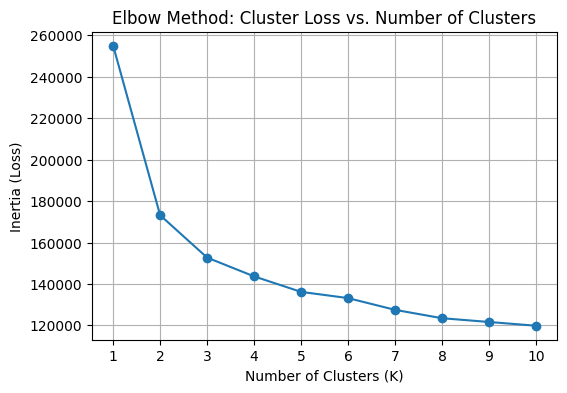

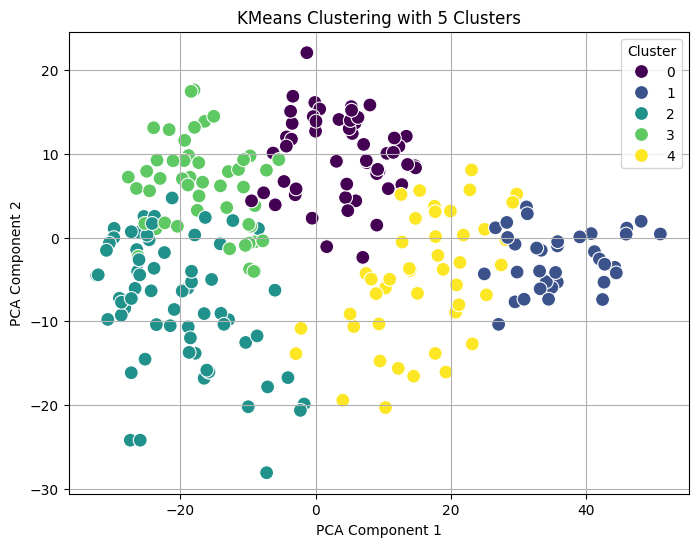

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import copy
clr_data=copy.deepcopy(clr_df)
# 범위 설정 (예: 1~10 클러스터)
K_range = range(1, 11)
inertias_clr = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clr_data.drop(columns='cluster', errors='ignore'))  # sample x feature
    inertias_clr.append(kmeans.inertia_)  # inertia = sum of squared distances to cluster centers
plt.figure(figsize=(6, 4))
plt.plot(K_range, inertias_clr, marker='o')
plt.title('Elbow Method: Cluster Loss vs. Number of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Loss)')
plt.xticks(K_range)
plt.grid(True)
plt.show()

# KMeans clustering with the optimal number of clusters
optimal_k = 5  # You can change this based on the elbow method result

# perform pca
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
pca_data = pca.fit_transform(clr_data.drop(columns='cluster', errors='ignore'))
clr_data['cluster'] = KMeans(n_clusters=optimal_k, random_state=42).fit_predict(clr_data.drop(columns='cluster', errors='ignore'))
# Add PCA results to the DataFrame
clr_data['pca1'] = pca_data[:, 0]
clr_data['pca2'] = pca_data[:, 1]
# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=clr_data, x='pca1', y='pca2', hue='cluster', palette='viridis', s=100)
plt.title(f'KMeans Clustering with {optimal_k} Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
#plt.savefig('kmeans_clustering.png')
# Save the results to an Excel file

## pca를 통한 시각화해보기 (clustering이 잘 되었는지)

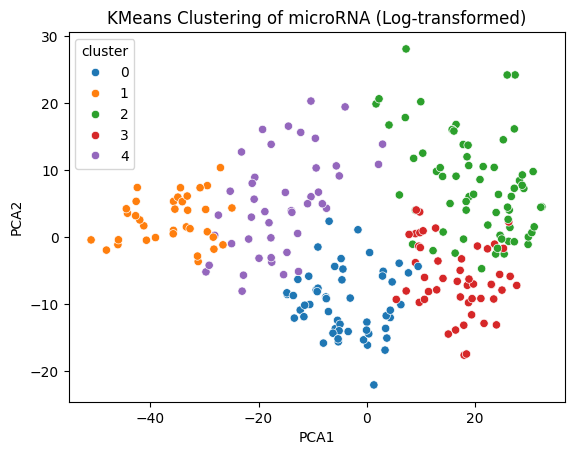

In [4]:
# do the same for log transformed data
#sci-kit pca  
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
# Perform KMeans clustering on clr transformed data

import seaborn as sns
log_data = copy.deepcopy(log_df)
n_clusters = 5  # 원하는 클러스터 수
kmeans_log = KMeans(n_clusters=n_clusters, random_state=42)
labels_log = kmeans_log.fit_predict(log_data)
# 결과 저장
log_data['cluster'] = labels_log
pca_log = PCA(n_components=2)
pca_result_log = pca_log.fit_transform(log_data.drop('cluster', axis=1))
log_data['PCA1'] = pca_result_log[:, 0]
log_data['PCA2'] = pca_result_log[:, 1]
# Plot
sns.scatterplot(data=log_data, x='PCA1', y='PCA2', hue='cluster', palette='tab10')
plt.title("KMeans Clustering of microRNA (Log-transformed)")
plt.show()


## log transform과 clr transform 비교 

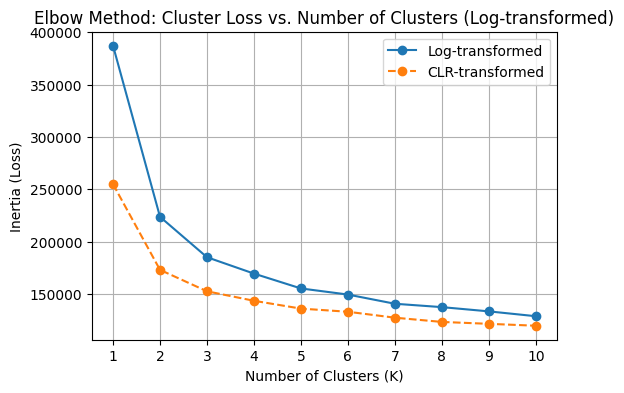

In [5]:

# Elbow method for log transformed data
inertias_log = []
for k in K_range:
    kmeans_log = KMeans(n_clusters=k, random_state=42)
    kmeans_log.fit(log_data.drop(columns='cluster', errors='ignore'))  # sample x feature
    inertias_log.append(kmeans_log.inertia_)  # inertia = sum of squared distances to cluster centers
plt.figure(figsize=(6, 4))
plt.plot(K_range, inertias_log, marker='o', label='Log-transformed')
# plot clr together with log transformed data
plt.plot(K_range, inertias_clr, marker='o', label='CLR-transformed', linestyle='--')
plt.legend()
plt.title('Elbow Method: Cluster Loss vs. Number of Clusters (Log-transformed)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Loss)')
plt.xticks(K_range)
plt.grid(True)
plt.show()

## clustering 기반의 hypothesis testing 
cluster 수를 5개로 맞추고 전체 데이터를 사용하여 clustering을 진행한 후,  각 그룹마다 정해진 clustering을 할당해준 뒤에, cluster간의 차이를 t-test를 통해서 비교. 

In [56]:
# setting cluster number as 5, I want to do the clustering for data_clr[:10] and data_clr[10:20], data_clr[20:30]

clr_data = copy.deepcopy(clr_df)
n_clusters = 5  # 원하는 클러스터 수
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10000, random_state=434)
labels = kmeans.fit_predict(clr_data)

# 결과 저장

clr_data['cluster'] = labels




## 각 상태에 대한 시각화 

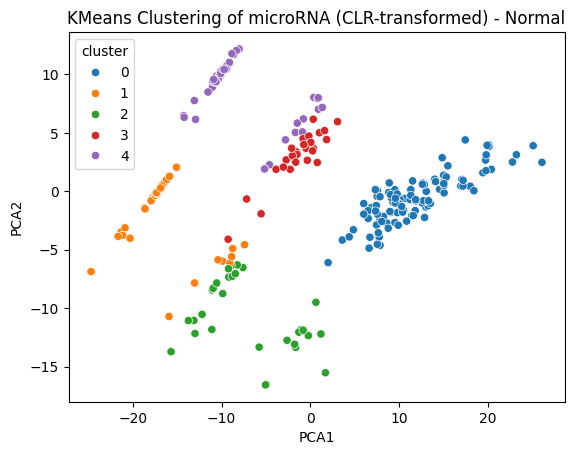

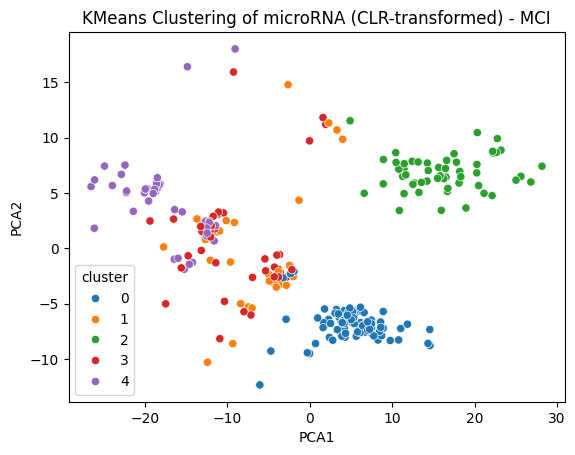

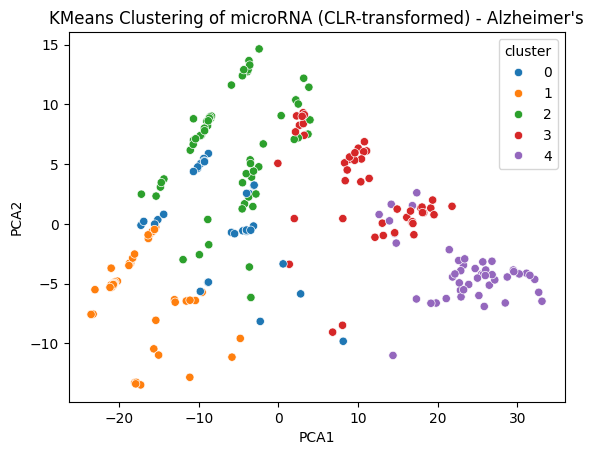

In [57]:
#I want to do the clustering for data_clr[:10] and data_clr[10:20], data_clr[20:30]

clr_data_1 = clr_data.iloc[:, :10]
clr_data_2 = clr_data.iloc[:, 10:20]
clr_data_3 = clr_data.iloc[:, 20:30]
#kmeans_1 = KMeans(n_clusters=n_clusters, random_state=42)
labels_1 = kmeans.fit_predict(clr_data_1)
#kmeans_2 = KMeans(n_clusters=n_clusters, random_state=42)
labels_2 = kmeans.fit_predict(clr_data_2)
#kmeans_3 = KMeans(n_clusters=n_clusters, random_state=42)
labels_3 = kmeans.fit_predict(clr_data_3)
# 결과 저장

clr_data_1['cluster'] = labels_1
clr_data_2['cluster'] = labels_2
clr_data_3['cluster'] = labels_3
# Plotting the clusters for each segment
# do the Pca
pca_1 = PCA(n_components=2)
pca_result_1 = pca_1.fit_transform(clr_data_1.drop('cluster', axis=1))
clr_data_1['PCA1'] = pca_result_1[:, 0]
clr_data_1['PCA2'] = pca_result_1[:, 1]
pca_2 = PCA(n_components=2)
pca_result_2 = pca_2.fit_transform(clr_data_2.drop('cluster', axis=1))
clr_data_2['PCA1'] = pca_result_2[:, 0]
clr_data_2['PCA2'] = pca_result_2[:, 1]
pca_3 = PCA(n_components=2)
pca_result_3 = pca_3.fit_transform(clr_data_3.drop('cluster', axis=1))
clr_data_3['PCA1'] = pca_result_3[:, 0]
clr_data_3['PCA2'] = pca_result_3[:, 1]
# Plotting the clusters for each segment
sns.scatterplot(data=clr_data_1, x='PCA1', y='PCA2', hue='cluster', palette='tab10')
plt.title("KMeans Clustering of microRNA (CLR-transformed) - Normal")
plt.show()
sns.scatterplot(data=clr_data_2, x='PCA1', y='PCA2', hue='cluster', palette='tab10')
plt.title("KMeans Clustering of microRNA (CLR-transformed) - MCI")
plt.show()
sns.scatterplot(data=clr_data_3, x='PCA1', y='PCA2', hue='cluster', palette='tab10')
plt.title("KMeans Clustering of microRNA (CLR-transformed) - Alzheimer's")
plt.show()


In [58]:


# now, i want to do the hypothesis testing for each cluster 
from scipy.stats import ttest_ind

# Assuming clr_data_1, clr_data_2, and clr_data_3 are the dataframes for each segment


# Perform t-tests for each cluster

cluster_0_data_1 = clr_data_1[clr_data_1['cluster'] == 0].values
cluster_0_data_2 = clr_data_2[clr_data_2['cluster'] == 0].values
cluster_0_data_3 = clr_data_3[clr_data_3['cluster'] == 0].values
cluster_0_data_1=cluster_0_data_1.reshape(cluster_0_data_1.shape[0]*cluster_0_data_1.shape[1],-1)
cluster_0_data_2=cluster_0_data_2.reshape(cluster_0_data_2.shape[0]*cluster_0_data_2.shape[1],-1)
cluster_0_data_3=cluster_0_data_3.reshape(cluster_0_data_3.shape[0]*cluster_0_data_3.shape[1],-1)
from scipy.stats import ttest_ind

t_stat_0, p_value_0 = ttest_ind(cluster_0_data_1, cluster_0_data_2, equal_var=False)
print(f"Cluster 0: t-statistic = {t_stat_0}, p-value = {p_value_0}")

t_stat_0_3, p_value_0_3 = ttest_ind(cluster_0_data_1, cluster_0_data_3, equal_var=False)
print(f"Cluster 0 (Normal vs Alzheimer's): t-statistic = {t_stat_0_3}, p-value = {p_value_0_3}")
t_stat_0_2, p_value_0_2 = ttest_ind(cluster_0_data_2, cluster_0_data_3, equal_var=False)
print(f"Cluster 0 (MCI vs Alzheimer's): t-statistic = {t_stat_0_2}, p-value = {p_value_0_2}")
# Repeat for other clusters
cluster_1_data_1 = clr_data_1[clr_data_1['cluster'] == 1].values
cluster_1_data_2 = clr_data_2[clr_data_2['cluster'] == 1].values
cluster_1_data_3 = clr_data_3[clr_data_3['cluster'] == 1].values
cluster_1_data_1=cluster_1_data_1.reshape(cluster_1_data_1.shape[0]*cluster_1_data_1.shape[1],-1)
cluster_1_data_2=cluster_1_data_2.reshape(cluster_1_data_2.shape[0]*cluster_1_data_2.shape[1],-1)
cluster_1_data_3=cluster_1_data_3.reshape(cluster_1_data_3.shape[0]*cluster_1_data_3.shape[1],-1)
t_stat_1, p_value_1 = ttest_ind(cluster_1_data_1, cluster_1_data_2, equal_var=False)
print(f"Cluster 1: (Normal vs MCI's) = {t_stat_1}, p-value = {p_value_1}")
t_stat_1_3, p_value_1_3 = ttest_ind(cluster_1_data_1, cluster_1_data_3, equal_var=False)
print(f"Cluster 1 (Normal vs Alzheimer's): t-statistic = {t_stat_1_3}, p-value = {p_value_1_3}")
t_stat_1_2, p_value_1_2 = ttest_ind(cluster_1_data_2, cluster_1_data_3, equal_var=False)
print(f"Cluster 1 (MCI vs Alzheimer's): t-statistic = {t_stat_1_2}, p-value = {p_value_1_2}")
# Repeat for other clusters
cluster_2_data_1 = clr_data_1[clr_data_1['cluster'] == 2].values
cluster_2_data_2 = clr_data_2[clr_data_2['cluster'] == 2].values
cluster_2_data_3 = clr_data_3[clr_data_3['cluster'] == 2].values
cluster_2_data_1=cluster_2_data_1.reshape(cluster_2_data_1.shape[0]*cluster_2_data_1.shape[1],-1)
cluster_2_data_2=cluster_2_data_2.reshape(cluster_2_data_2.shape[0]*cluster_2_data_2.shape[1],-1)
cluster_2_data_3=cluster_2_data_3.reshape(cluster_2_data_3.shape[0]*cluster_2_data_3.shape[1],-1)
t_stat_2, p_value_2 = ttest_ind(cluster_2_data_1, cluster_2_data_2, equal_var=False)
print(f"Cluster 2:(Normal vs mci's) = {t_stat_2}, p-value = {p_value_2}")
t_stat_2_3, p_value_2_3 = ttest_ind(cluster_2_data_1, cluster_2_data_3, equal_var=False)
print(f"Cluster 2 (Normal vs Alzheimer's): t-statistic = {t_stat_2_3}, p-value = {p_value_2_3}")
t_stat_2_2, p_value_2_2 = ttest_ind(cluster_2_data_2, cluster_2_data_3, equal_var=False)

print(f"Cluster 2 (MCI vs Alzheimer's): t-statistic = {t_stat_2_2}, p-value = {p_value_2_2}")
# Repeat for other clusters
cluster_3_data_1 = clr_data_1[clr_data_1['cluster'] == 3].values
cluster_3_data_2 = clr_data_2[clr_data_2['cluster'] == 3].values
cluster_3_data_3 = clr_data_3[clr_data_3['cluster'] == 3].values
cluster_3_data_1=cluster_3_data_1.reshape(cluster_3_data_1.shape[0]*cluster_3_data_1.shape[1],-1)
cluster_3_data_2=cluster_3_data_2.reshape(cluster_3_data_2.shape[0]*cluster_3_data_2.shape[1],-1)
cluster_3_data_3=cluster_3_data_3.reshape(cluster_3_data_3.shape[0]*cluster_3_data_3.shape[1],-1)
t_stat_3, p_value_3 = ttest_ind(cluster_3_data_1, cluster_3_data_2, equal_var=False)
print(f"Cluster 3: (Normal vs MCI's) = {t_stat_3}, p-value = {p_value_3}")
t_stat_3_3, p_value_3_3 = ttest_ind(cluster_3_data_1, cluster_3_data_3, equal_var=False)
print(f"Cluster 3 (Normal vs Alzheimer's): t-statistic = {t_stat_3_3}, p-value = {p_value_3_3}")
t_stat_3_2, p_value_3_2 = ttest_ind(cluster_3_data_2, cluster_3_data_3, equal_var=False)
print(f"Cluster 3 (MCI vs Alzheimer's): t-statistic = {t_stat_3_2}, p-value = {p_value_3_2}")
# Repeat for other clusters
cluster_4_data_1 = clr_data_1[clr_data_1['cluster'] == 4].values
cluster_4_data_2 = clr_data_2[clr_data_2['cluster'] == 4].values
cluster_4_data_3 = clr_data_3[clr_data_3['cluster'] == 4].values
cluster_4_data_1=cluster_4_data_1.reshape(cluster_4_data_1.shape[0]*cluster_4_data_1.shape[1],-1)
cluster_4_data_2=cluster_4_data_2.reshape(cluster_4_data_2.shape[0]*cluster_4_data_2.shape[1],-1)
cluster_4_data_3=cluster_4_data_3.reshape(cluster_4_data_3.shape[0]*cluster_4_data_3.shape[1],-1)
t_stat_4, p_value_4 = ttest_ind(cluster_4_data_1, cluster_4_data_2, equal_var=False)
print(f"Cluster 4: (Normal vs MCI's) = {t_stat_4}, p-value = {p_value_4}")
t_stat_4_3, p_value_4_3 = ttest_ind(cluster_4_data_1, cluster_4_data_3, equal_var=False)
print(f"Cluster 4 (Normal vs Alzheimer's): t-statistic = {t_stat_4_3}, p-value = {p_value_4_3}")
t_stat_4_2, p_value_4_2 = ttest_ind(cluster_4_data_2, cluster_4_data_3, equal_var=False)
print(f"Cluster 4 (MCI vs Alzheimer's): t-statistic = {t_stat_4_2}, p-value = {p_value_4_2}")



Cluster 0: t-statistic = [15.3175218], p-value = [1.51825669e-50]
Cluster 0 (Normal vs Alzheimer's): t-statistic = [16.85776195], p-value = [9.77374455e-51]
Cluster 0 (MCI vs Alzheimer's): t-statistic = [8.66824794], p-value = [5.51499406e-17]
Cluster 1: (Normal vs MCI's) = [-5.68065268], p-value = [1.8849083e-08]
Cluster 1 (Normal vs Alzheimer's): t-statistic = [5.07860002], p-value = [4.46858702e-07]
Cluster 1 (MCI vs Alzheimer's): t-statistic = [10.72006811], p-value = [4.30901975e-25]
Cluster 2:(Normal vs mci's) = [-26.22913979], p-value = [4.54174078e-109]
Cluster 2 (Normal vs Alzheimer's): t-statistic = [-5.39580223], p-value = [8.62451864e-08]
Cluster 2 (MCI vs Alzheimer's): t-statistic = [23.1642236], p-value = [3.13385389e-100]
Cluster 3: (Normal vs MCI's) = [7.10280952], p-value = [2.53889279e-12]
Cluster 3 (Normal vs Alzheimer's): t-statistic = [-11.54367383], p-value = [9.08475491e-29]
Cluster 3 (MCI vs Alzheimer's): t-statistic = [-18.03631647], p-value = [4.33708961e-64]


## p-value 시각화

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 클러스터 수
n_clusters = 5

# 비교 그룹
comparisons = ['Normal vs MCI', 'Normal vs AD', 'MCI vs AD']

# 각 클러스터별 p-values를 저장할 리스트
p_values = []

# 각 클러스터에 대해 반복
for i in range(n_clusters):
    # cluster_i_data_{1,2,3}은 위 코드에서 정의한 것과 동일
    data_1 = eval(f'cluster_{i}_data_1')
    data_2 = eval(f'cluster_{i}_data_2')
    data_3 = eval(f'cluster_{i}_data_3')

    p_row = []
    _, p_12 = ttest_ind(data_1, data_2, equal_var=False)
    _, p_13 = ttest_ind(data_1, data_3, equal_var=False)
    _, p_23 = ttest_ind(data_2, data_3, equal_var=False)

    p_row.extend([p_12.item(), p_13.item(), p_23.item()])
    p_values.append(p_row)

# 데이터프레임으로 변환
p_df = pd.DataFrame(p_values, columns=comparisons, index=[f"Cluster {i}" for i in range(n_clusters)])


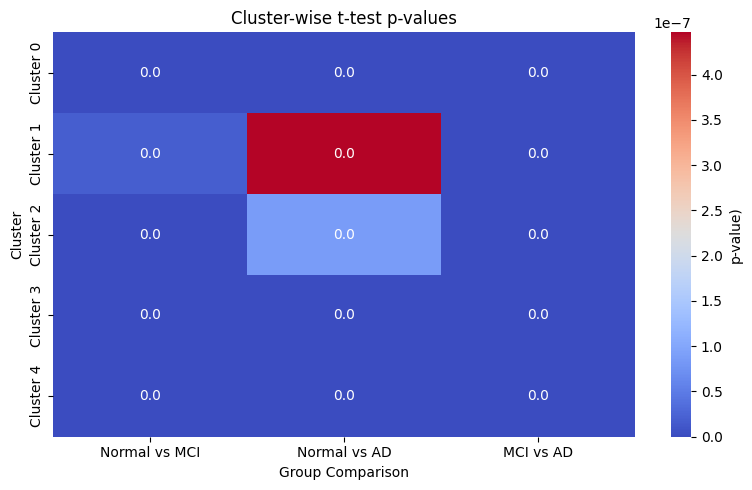

In [60]:
# -log10(p-value)로 변환해서 유의성을 강조
p_df

plt.figure(figsize=(8, 5))
sns.heatmap(p_df, annot=p_df.round(3), fmt="", cmap="coolwarm", cbar_kws={'label': 'p-value)'})
plt.title("Cluster-wise t-test p-values")
plt.xlabel("Group Comparison")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()